In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv('titanic3.csv')

In [18]:
data.replace('?', np.nan, inplace= True) #замена '?' на nan
data = data.astype({"age": np.float64, "fare": np.float64}) #изменение типа ячеек


Выявляем взаимосвязи между выживанием и входными переменными данными, а также для расчета корреляций. Для этого все используемые переменные должны быть числовыми для расчета корреляции, и в настоящее время пол хранится в виде строки. 

In [12]:
data.replace({'male': 1, 'female': 0}, inplace=True) # заменяем пол на цифровое значение для удобного подстчета


/var/folders/9r/8ct5hzls1f13fzpnb590x1s40000gn/T/ipykernel_12967/3569984372.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'male': 1, 'female': 0}, inplace=True) # заменяем пол на цифровое значение для удобного подстчета


<Axes: xlabel='survived', ylabel='fare'>

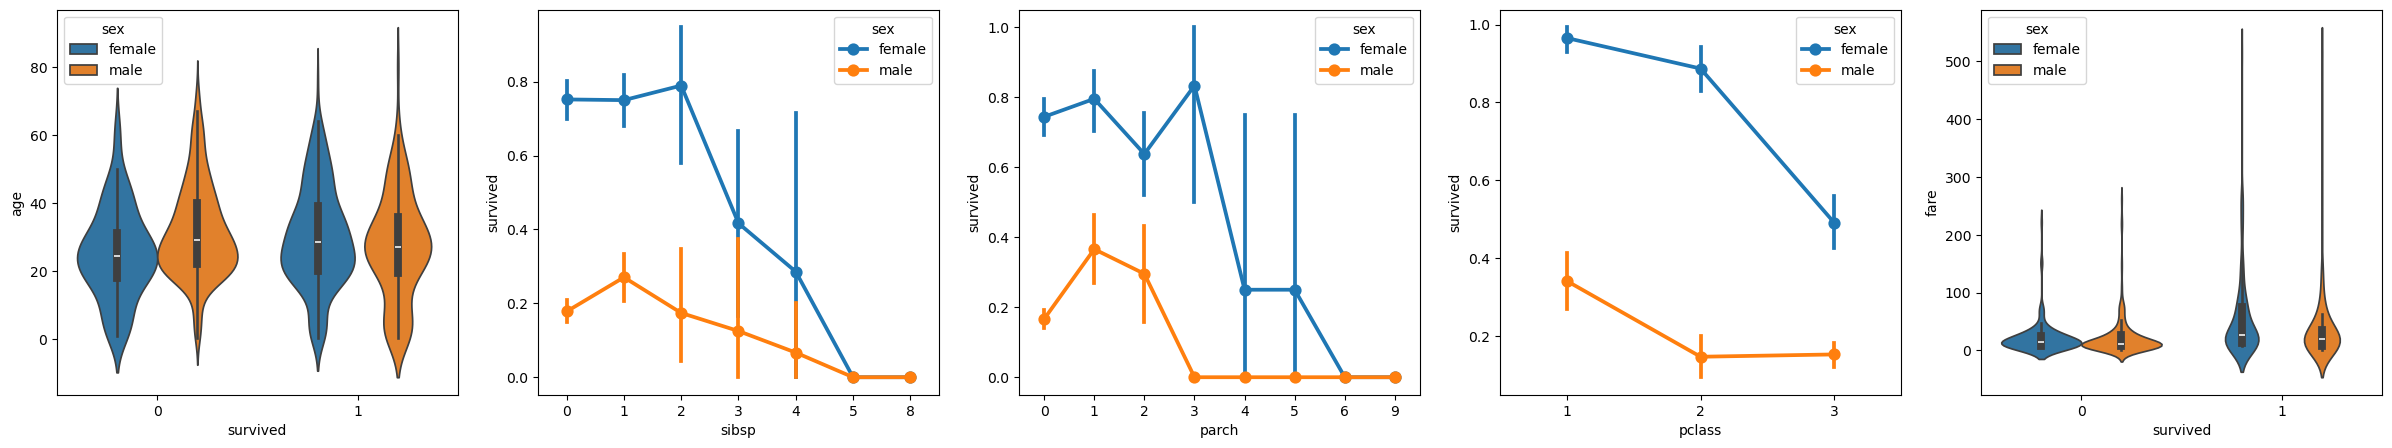

In [19]:
fig, axs = plt.subplots(ncols=5, figsize=(30,5))

sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

Анализируем корреляцию между всеми входными переменными, чтобы определить функции, которые были бы лучшими входными данными для модели машинного обучения. Чем ближе значение к 1, тем выше корреляция между значением и результатом.

In [13]:
data.corr(numeric_only=True).abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


Глядя на результаты корреляции, вы замечваем, что некоторые переменные, такие как пол, имеют довольно высокую корреляцию с выживанием, в то время как другие, такие как родственники (sibsp = братья и сестры или супруг, parch = родители или дети), кажется, имеют небольшую корреляцию.

Давайте предположим, что sibsp и parch связаны тем, как они влияют на выживаемость, и сгруппируем их в новую колонку, называемую «родственниками», чтобы увидеть, имеет ли их комбинация более высокую корреляцию с выживаемостью. Для этого проверим, если у каждого пассажрира родственники.

In [14]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


Замечаем, что на самом деле, если у человека были родственники, то существует более высокая корреляция с выживанием. Имея эту информацию под рукой, теперь можно выбросить из набора данных столбцы sibsp и parch с низким значением, а также любые строки, которые имели значения NaN, чтобы в конечном итоге получить набор данных, который можно использовать для обучения модели.

In [15]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()